# Analiza rynku pracy - projekt

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Ustawiamy maxymalną liczbę kolumn na 10.

In [10]:
pd.set_option("display.max_columns", 10)

## 1. Wczytanie danych

In [42]:
df = pd.read_csv("data/job_market.csv")
df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")
df.head(1)

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
0,Engineering Manager,DataInc,"San Francisco, CA",Remote,Technology,151082,291345,4.0,2025-11-27,"AWS, Agile, Machine Learning, Kubernetes, Mong..."


## 2. Wstępna eksploracja danych

### 2.1. Kształt dataframe'u

In [34]:
df.shape

(250, 10)

#### W dataframe'ie mamy 250 wierszy i 10 kolumn.

### 2.2. Statystyki opisowe

In [35]:
round(df.describe(),2)

,salary_min,salary_max,experience_required
count,250.00,250.00,207.00
mean,89067.90,155685.42,4.23
std,23183.59,42842.17,2.46
min,45000.00,70000.00,0.00
25%,71880.50,130631.75,2.50
50%,88136.00,149535.00,4.00
75%,105755.25,186913.50,5.00
max,156891.00,291345.00,12.00


#### Na podstawie powyższej tabeli widzimy, że:
#### - najniższe wynagrodzenie wynosi: 45000.00 zł
#### - najwyższe wynagrodzenie wynosi: 291345.00 zł
#### - średnia minimalnego wynagrodzenia wynosi: 89067.90 zł
#### - średnia maksymalnego wynagrodzenia wynosi: 155685.42 zł
#### - odchylenie standardowe dla pensji minimalnej wynosi: 23183.59 zł
#### - odchylenie standardowe dla pensji maksymalnej wynosi: 291345.00 zł
#### - mediana wynagrodzenia minimalnego wynosi: 88136.00 zł
#### - mediana wynagrodzenia maksymalnego wynosi: 149535.00 zł

### 2.3. Typy danych

In [43]:
df.dtypes

job_title                      object
company                        object
location                       object
job_type                       object
category                       object
salary_min                      int64
salary_max                      int64
experience_required           float64
publication_date       datetime64[ns]
skills                         object
dtype: object

### 2.4. Wartości brakujące

In [44]:
df.isna().sum()

job_title               0
company                 0
location                0
job_type               29
category               20
salary_min              0
salary_max              0
experience_required    43
publication_date       50
skills                 50
dtype: int64

### 2.5. Podsumowanie infomracji o dataframe

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   job_title            250 non-null    object        
 1   company              250 non-null    object        
 2   location             250 non-null    object        
 3   job_type             221 non-null    object        
 4   category             230 non-null    object        
 5   salary_min           250 non-null    int64         
 6   salary_max           250 non-null    int64         
 7   experience_required  207 non-null    float64       
 8   publication_date     200 non-null    datetime64[ns]
 9   skills               200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 19.7+ KB


### 2.6. Usunięcie niepotrzebnych kolumn

In [46]:
columns_to_drop = ["skills"]
df.drop(columns_to_drop, axis=1, inplace=True)
df.head(1)

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date
0,Engineering Manager,DataInc,"San Francisco, CA",Remote,Technology,151082,291345,4.0,2025-11-27


## 3. Badanie rozkładów pojedynczych

### 3.1. Jakie typy zatrudnienia dominują (full-time / contract / remote)?

In [56]:
vc = df["job_type"].value_counts()
vc

job_type
Remote                        55
Full-time                     50
Contract                      50
Part-time                     49
berufserfahren                 6
Full time                      3
Working student                3
professional / experienced     2
manager                        1
Internship                     1
berufseinstieg                 1
Name: count, dtype: int64

### 3.2. Jakie typy zatrudnienia dominują w wartościach procentowych (full-time / contract / remote)?

In [57]:
proportions = round((df["job_type"].value_counts(normalize=True) * 100), 2)
proportions

job_type
Remote                        24.89
Full-time                     22.62
Contract                      22.62
Part-time                     22.17
berufserfahren                 2.71
Full time                      1.36
Working student                1.36
professional / experienced     0.90
manager                        0.45
Internship                     0.45
berufseinstieg                 0.45
Name: proportion, dtype: float64

In [58]:
top4 = proportions.sort_values(ascending=False).head(4)
top4

job_type
Remote       24.89
Full-time    22.62
Contract     22.62
Part-time    22.17
Name: proportion, dtype: float64

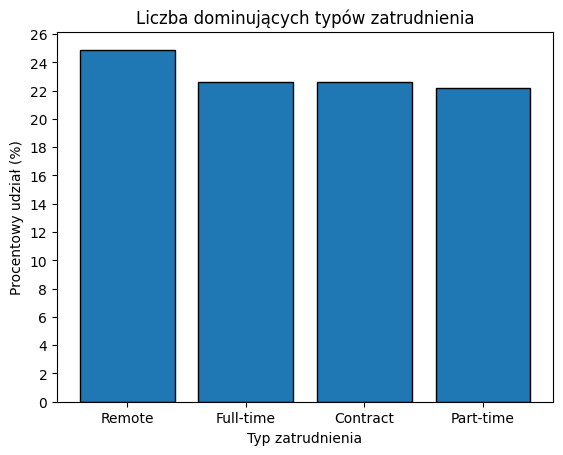

In [75]:
plt.bar(top4.index, top4.values, width=0.8, edgecolor='black')
plt.xticks([0, 1, 2, 3], ["Remote", "Full-time", "Contract", "Part-time"])
plt.title("Liczba dominujących typów zatrudnienia")
plt.xlabel("Typ zatrudnienia")
plt.ylabel("Procentowy udział (%)")
plt.yticks(np.arange(0, top4.max() + 2, 2))
plt.show()

### 3.3. Ranking najczęściej występujących stanowisk

In [85]:
job_title = df["job_title"].value_counts()
job_title

job_title
Machine Learning Engineer                                                                                                            14
Solutions Architect                                                                                                                  13
Software Engineer                                                                                                                    13
Technical Lead                                                                                                                       13
Senior Software Engineer                                                                                                             12
Scooter Mechanic                                                                                                                     11
Project Manager                                                                                                                      10
Business Analyst                      

In [99]:
top10_job_title = job_title.sort_values(ascending=False).head(10)
top10_job_title

job_title
Machine Learning Engineer    14
Solutions Architect          13
Software Engineer            13
Technical Lead               13
Senior Software Engineer     12
Scooter Mechanic             11
Project Manager              10
Business Analyst             10
Frontend Developer            9
Product Manager               9
Name: count, dtype: int64

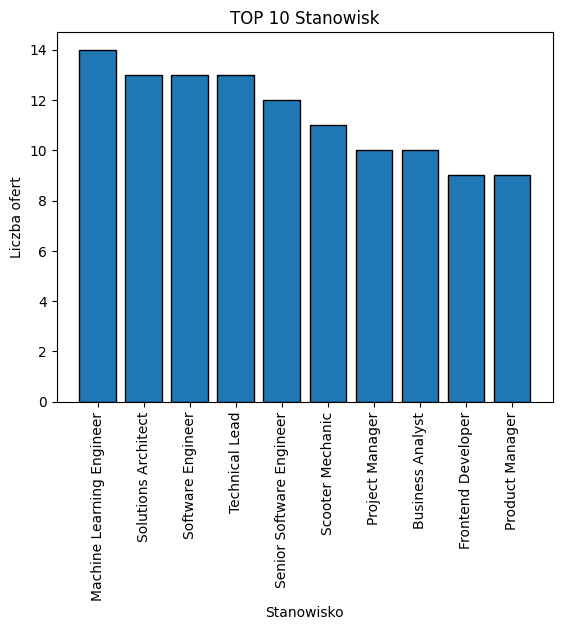

In [84]:
plt.bar(top10_job_title.index, top10_job_title.values, width=0.8, edgecolor='black')
plt.title("TOP 10 Stanowisk")
plt.xlabel("Stanowisko")
plt.ylabel("Liczba ofert")
plt.xticks(rotation=90)
plt.show()

### 3.4. Jak wygląda rozkład ofert pracy w różnych lokalizacjach?

In [88]:
location = df["location"].value_counts()
location

location
Austin, TX                                    27
Boston, MA                                    23
New York, NY                                  20
Denver, CO                                    20
Atlanta, GA                                   17
Chicago, IL                                   16
Toronto, Canada                               16
Remote                                        16
San Francisco, CA                             14
Seattle, WA                                   13
London, UK                                    10
Berlin, Germany                                8
Berlin                                         8
Munich                                         4
Berlin, Berlin, Germany                        3
Munich, Bavaria, Germany                       2
Hamburg                                        2
Fürth                                          2
Konstanz                                       2
Augsburg, Bavaria, Germany                     2
Düsseldorf 

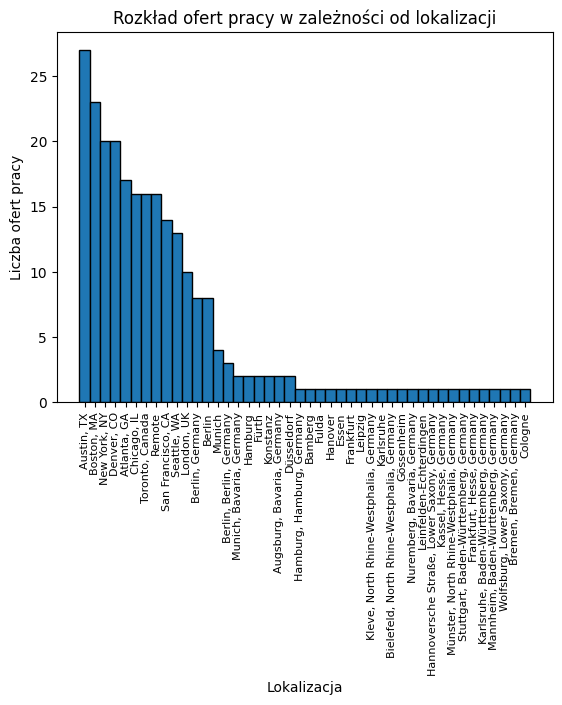

In [94]:
plt.bar(location.index, location.values, width=1, edgecolor='black')
plt.title("Rozkład ofert pracy w zależności od lokalizacji")
plt.xlabel("Lokalizacja")
plt.ylabel("Liczba ofert pracy")
plt.xticks(rotation=90, fontsize=8)
plt.show()

### 3.5. Które firmy publikują najwięcej ofert? (ranking 10 największych)

In [95]:
company = df["company"].value_counts()
company

company
DataInc                                      25
EnterpriseHub                                24
WebDynamics                                  23
TechCorp                                     23
DigitalWorks                                 20
CodeFactory                                  20
InnovateLab                                  17
CloudSystems                                 17
StartupXYZ                                   16
AI Solutions                                 15
Bolt Technology                              15
Paymentology                                  3
SolarEdge                                     2
Wolt - English                                2
Corominas Consulting GmbH                     2
Greenfield Technology AG                      2
Skalar                                        1
HHL Leipzig Graduate School of Management     1
Automat-it                                    1
1KOMMA5˚                                      1
fleeky GmbH                     

In [96]:
top10_company = company.sort_values(ascending=False).head(10)
top10_company

company
DataInc          25
EnterpriseHub    24
WebDynamics      23
TechCorp         23
DigitalWorks     20
CodeFactory      20
InnovateLab      17
CloudSystems     17
StartupXYZ       16
AI Solutions     15
Name: count, dtype: int64

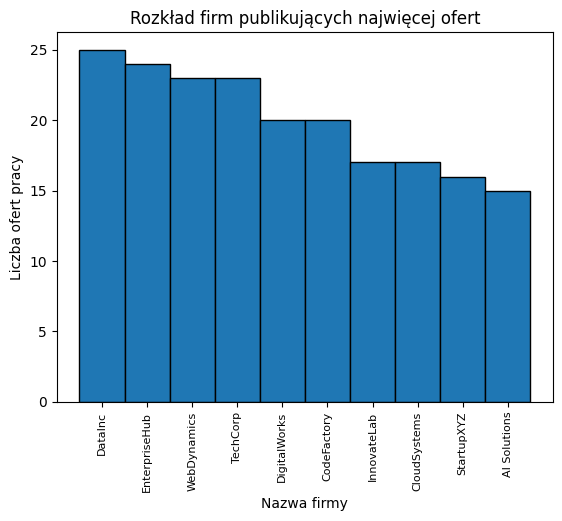

In [97]:
plt.bar(top10_company.index, top10_company.values, width=1, edgecolor='black')
plt.title("Rozkład firm publikujących najwięcej ofert")
plt.xlabel("Nazwa firmy")
plt.ylabel("Liczba ofert pracy")
plt.xticks(rotation=90, fontsize=8)
plt.show()

## 4. Analiza zależności między zmiennymi.

### 4.1. Jakie są różnice płac między stanowiskami (top 10 stanowisk)?

In [111]:
top10_job_title = df["job_title"].value_counts().head(10).index
top10_job_title

Index(['Machine Learning Engineer', 'Solutions Architect', 'Software Engineer',
       'Technical Lead', 'Senior Software Engineer', 'Scooter Mechanic',
       'Project Manager', 'Business Analyst', 'Frontend Developer',
       'Product Manager'],
      dtype='object', name='job_title')

In [112]:
df_top10 = df[df["job_title"].isin(top10_job_title)]
df_top10

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date
4,Senior Software Engineer,DigitalWorks,"San Francisco, CA",Full-time,Technology,148141,252584,9.0,2025-11-27
5,Senior Software Engineer,WebDynamics,"Seattle, WA",Part-time,Technology,147870,248059,8.0,2025-11-27
9,Project Manager,DataInc,"New York, NY",Full-time,Technology,133004,237154,2.0,2025-11-27
10,Product Manager,EnterpriseHub,"San Francisco, CA",Contract,Technology,134354,233476,4.0,2025-11-27
11,Product Manager,EnterpriseHub,"London, UK",Part-time,Technology,133776,232759,5.0,2025-11-27
...,...,...,...,...,...,...,...,...,...
232,Scooter Mechanic,Bolt Technology,"Frankfurt, Hesse, Germany",NaN,NaN,60000,100000,NaN,NaT
233,Scooter Mechanic,Bolt Technology,"Mannheim, Baden-Württemberg, Germany",NaN,NaN,60000,100000,NaN,NaT
234,Scooter Mechanic,Bolt Technology,"Berlin, Berlin, Germany",NaN,NaN,60000,100000,NaN,NaT
238,Business Analyst,InnovateLab,Remote,Full-time,Technology,63339,94476,3.0,2025-11-27


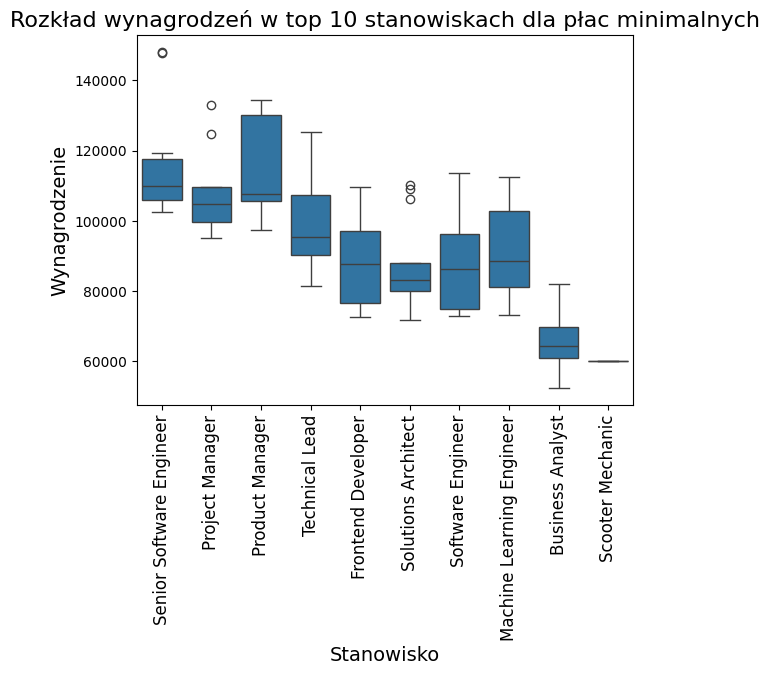

In [114]:
sns.boxplot(x="job_title", y="salary_min", data=df_top10)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Wynagrodzenie", fontsize=14)
plt.xlabel("Stanowisko", fontsize=14)
plt.title("Rozkład wynagrodzeń w top 10 stanowiskach dla płac minimalnych", fontsize=16)
plt.show()

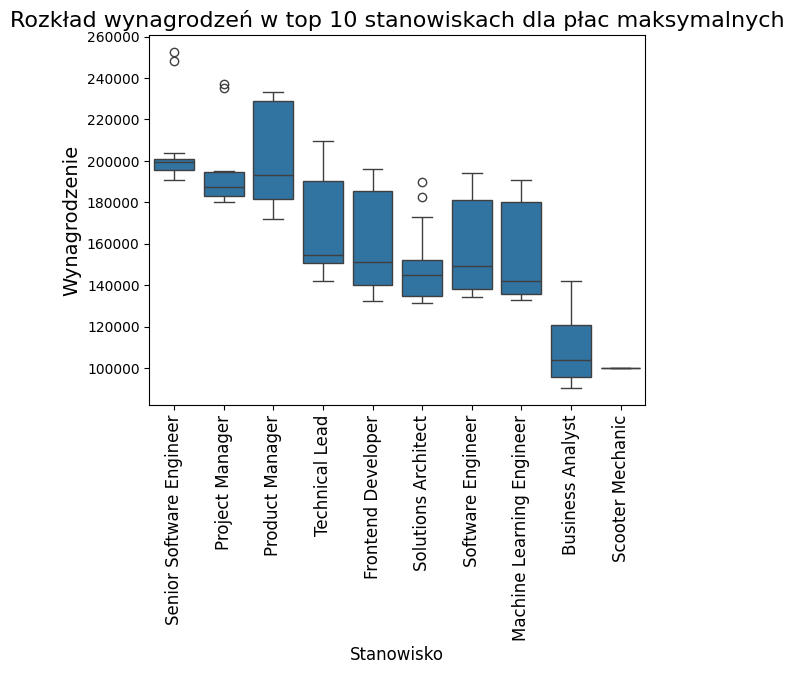

In [116]:
sns.boxplot(x="job_title", y="salary_max", data=df_top10)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Wynagrodzenie", fontsize=14)
plt.xlabel("Stanowisko", fontsize=12)
plt.title("Rozkład wynagrodzeń w top 10 stanowiskach dla płac maksymalnych", fontsize=16)
plt.show()

### 4.2. Czy większe wymagane doświadczenie → wyższa płaca?

#### Sprawdzam dla wynagrodzeń minimalnych

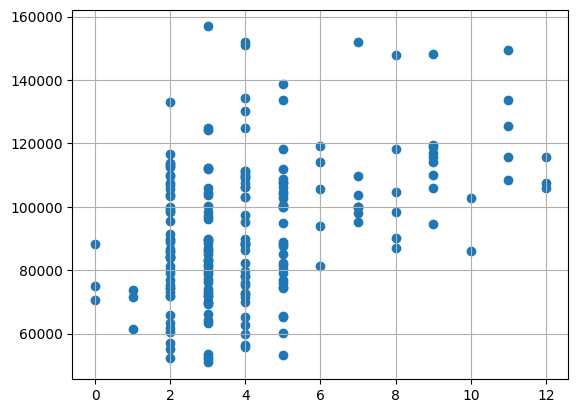

In [142]:
plt.scatter(df["experience_required"], df["salary_min"]);
plt.grid(True)

#### Sprawdzam dla wynagrodzeń maksymalnych

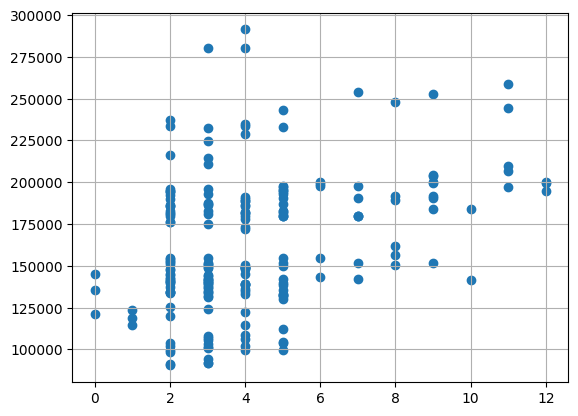

In [141]:
plt.scatter(df["experience_required"], df["salary_max"]);
plt.grid(True)

### 4.3. Które role mają najmniejsze wymagania, a płacą najlepiej?

In [132]:
best_roles = df.sort_values(by=["salary_max", "experience_required"], ascending=[False, True])
best_roles

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date
0,Engineering Manager,DataInc,"San Francisco, CA",Remote,Technology,151082,291345,4.0,2025-11-27
2,Engineering Manager,StartupXYZ,"Seattle, WA",Part-time,Technology,152134,280310,4.0,2025-11-27
1,Engineering Manager,EnterpriseHub,"New York, NY",Remote,Technology,156891,280075,3.0,2025-11-27
7,Lead Engineer,AI Solutions,"San Francisco, CA",Contract,Technology,133652,258933,11.0,2025-11-27
3,Lead Engineer,WebDynamics,"Seattle, WA",Full-time,Technology,151918,253988,7.0,2025-11-27
...,...,...,...,...,...,...,...,...,...
239,UX Designer,WebDynamics,Remote,Full-time,Technology,65938,91253,2.0,2025-11-27
246,Business Analyst,DigitalWorks,"Toronto, Canada",Part-time,Technology,52419,90437,2.0,2025-11-27
247,(Junior) Testautomatisierer (m/w/d) #LowCode,Greenfield Technology AG,Düsseldorf,NaN,Remote,45000,70000,NaN,NaT
248,(Junior) Media Buyer Influencer Marketing (m/w/d),benuta GmbH,Cologne,Contract,Marketing and Communication,45000,70000,NaN,NaT


In [134]:
top_roles = best_roles[["job_title", "experience_required", "salary_max"]].head(10)
top_roles

,job_title,experience_required,salary_max
0,Engineering Manager,4.0,291345
2,Engineering Manager,4.0,280310
1,Engineering Manager,3.0,280075
7,Lead Engineer,11.0,258933
3,Lead Engineer,7.0,253988
4,Senior Software Engineer,9.0,252584
5,Senior Software Engineer,8.0,248059
6,Senior Data Scientist,11.0,244158
8,Lead Engineer,5.0,242901
9,Project Manager,2.0,237154


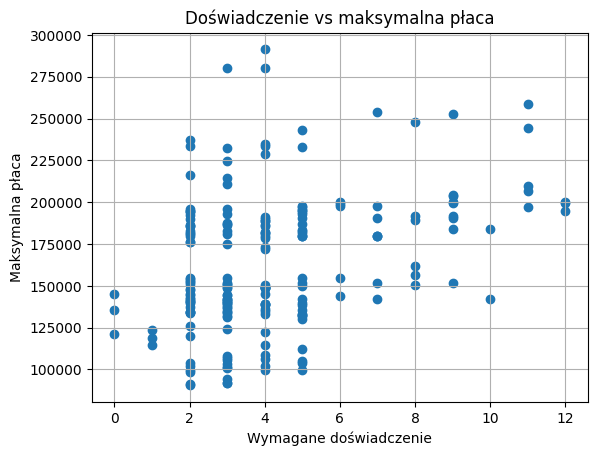

In [124]:
plt.scatter(df["experience_required"], df["salary_max"])
plt.xlabel("Wymagane doświadczenie")
plt.ylabel("Maksymalna płaca")
plt.title("Doświadczenie vs maksymalna płaca")
plt.grid(True)
plt.show()

### 4.4. Liczba ofert w zależności od doświadczenia

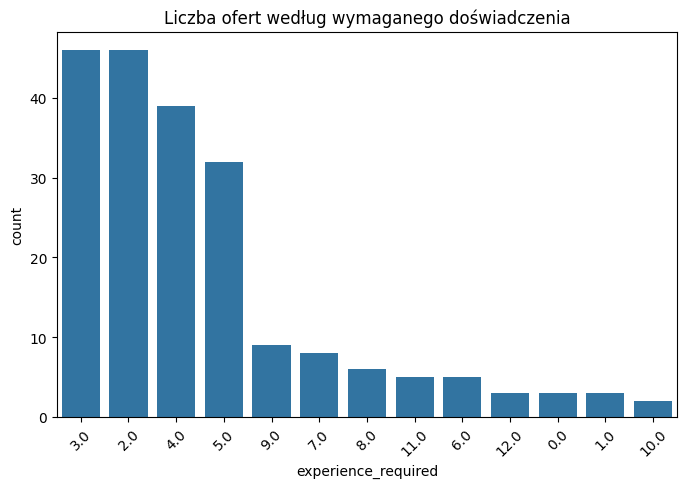

In [136]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='experience_required', order=df['experience_required'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Liczba ofert według wymaganego doświadczenia")
plt.show()

### 4.5. Najlepiej płatne stanowiska pracy z najmniejszym doświadczeniem

In [172]:
best_roles = df.sort_values(by=["salary_max", "experience_required"], ascending=[False, True])
top_roles = best_roles[["job_title", "experience_required", "salary_max"]].head(10)
top_roles

,job_title,experience_required,salary_max
0,Engineering Manager,4.0,291345
2,Engineering Manager,4.0,280310
1,Engineering Manager,3.0,280075
7,Lead Engineer,11.0,258933
3,Lead Engineer,7.0,253988
4,Senior Software Engineer,9.0,252584
5,Senior Software Engineer,8.0,248059
6,Senior Data Scientist,11.0,244158
8,Lead Engineer,5.0,242901
9,Project Manager,2.0,237154


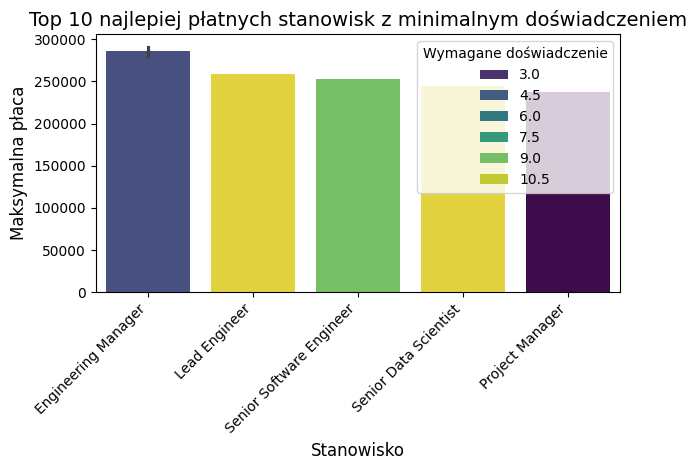

In [171]:
sns.barplot(
    data=top_roles,
    x="job_title",
    y="salary_max",
    hue="experience_required",
    dodge=False,
    palette="viridis"
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("Stanowisko", fontsize=12)
plt.ylabel("Maksymalna płaca", fontsize=12)
plt.title("Top 10 najlepiej płatnych stanowisk z minimalnym doświadczeniem", fontsize=14)
plt.legend(title="Wymagane doświadczenie")
plt.tight_layout()
plt.show()